In [ ]:
!pip install ultralytics --upgrade


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 106.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 77.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 65.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
import zipfile
import os

# Suponiendo que tu archivo se llama 'dataset.zip'
with zipfile.ZipFile("Alter_Minas.v3i.yolov11.zip", 'r') as zip_ref:
    zip_ref.extractall("dataset")

# Revisa que se haya extraído correctamente
os.listdir("dataset")

['train', 'test', 'README.roboflow.txt', 'data.yaml']

In [ ]:
from ultralytics import YOLO
model = YOLO("yolo11m.pt")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 18.4M/18.4M [00:00<00:00, 186MB/s]


# **Entrenar**

In [ ]:
results = model.train(
    data='/content/dataset/data.yaml',
    epochs=100,
    patience=15,
    imgsz=640,
    batch=8,                t
    lr0=0.0007,
    optimizer='SGD',
    warmup_epochs=3,
    cos_lr=True,

    # Augmentaciones
    fliplr=0.25,
    flipud=0.05,
    hsv_h=0.01,
    hsv_s=0.3,
    hsv_v=0.3,
    mosaic=0.2,
    translate=0.05,
    scale=0.1,
    shear=0.0,               # Evitamos deformar mucho
    perspective=0.0,
    mixup=0.05,
    copy_paste=0.05,
    close_mosaic=10
)

Ultralytics 8.3.152 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.05, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/content/dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.25, flipud=0.05, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.01, hsv_s=0.3, hsv_v=0.3, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0007, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.05, mode=train, model=yolo11s.pt, momentum=0.937, mosaic=0.2, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=SGD, overlap_mask=True, patience=15, perspective=0.0, plots=True, pose=12.0, pretrained

100%|██████████| 755k/755k [00:00<00:00, 143MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  3                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  4                  -1  1    103360  ultralytics.nn.modules.block.C3k2            [128, 256, 1, False, 0.25]    
  5                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  6                  -1  1    346112  ultralytics.nn.modules.block.C3k2            [256, 256, 1, True]           
  7                  -1  1   1180672  ultralytics

 22                  -1  1   1511424  ultralytics.nn.modules.block.C3k2            [768, 512, 1, True]           
 23        [16, 19, 22]  1    819795  ultralytics.nn.modules.head.Detect           [1, [128, 256, 512]]          
YOLO11s summary: 181 layers, 9,428,179 parameters, 9,428,163 gradients, 21.5 GFLOPs

Transferred 493/499 items from pretrained weights
Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 369MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1158.7±439.9 MB/s, size: 44.6 KB)


train: Scanning /content/dataset/train/labels... 320 images, 32 backgrounds, 0 corrupt: 100%|██████████| 320/320 [00:00<00:00, 2412.23it/s]

train: New cache created: /content/dataset/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 659.7±490.4 MB/s, size: 45.0 KB)


val: Scanning /content/dataset/train/labels.cache... 320 images, 32 backgrounds, 0 corrupt: 100%|██████████| 320/320 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: SGD(lr=0.0007, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.08G      2.241      15.74      1.974          4        640: 100%|██████████| 40/40 [00:09<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:06<00:00,  3.20it/s]

                   all        320        314     0.0976     0.0159    0.00813    0.00372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.49G      2.189      5.977      1.849          9        640: 100%|██████████| 40/40 [00:07<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:04<00:00,  4.78it/s]


                   all        320        314     0.0776     0.0828     0.0358     0.0121

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.52G       1.97      3.469      1.611         11        640: 100%|██████████| 40/40 [00:06<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.12it/s]

                   all        320        314      0.384      0.271      0.246      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.52G      1.745      2.521      1.441          7        640: 100%|██████████| 40/40 [00:06<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  6.53it/s]


                   all        320        314      0.537      0.392      0.381      0.202

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.52G      1.738      2.217      1.415          8        640: 100%|██████████| 40/40 [00:07<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  6.54it/s]

                   all        320        314      0.539      0.462      0.442      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.54G      1.626      1.919      1.342          8        640: 100%|██████████| 40/40 [00:07<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  6.52it/s]

                   all        320        314       0.65      0.529      0.567      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.54G      1.564      1.718      1.299          9        640: 100%|██████████| 40/40 [00:08<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  6.47it/s]

                   all        320        314      0.714      0.556      0.643      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.57G      1.508      1.539      1.288          8        640: 100%|██████████| 40/40 [00:07<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  6.61it/s]

                   all        320        314      0.656      0.589      0.662      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.57G      1.563      1.504      1.306          9        640: 100%|██████████| 40/40 [00:07<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.42it/s]

                   all        320        314      0.718      0.623      0.721      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.57G      1.493      1.376       1.27          7        640: 100%|██████████| 40/40 [00:06<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:04<00:00,  4.99it/s]

                   all        320        314      0.713      0.673       0.72      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.57G      1.398      1.277      1.194          7        640: 100%|██████████| 40/40 [00:06<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  6.12it/s]

                   all        320        314      0.745      0.708      0.765      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.57G      1.365      1.274      1.188          9        640: 100%|██████████| 40/40 [00:07<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  6.36it/s]

                   all        320        314      0.844       0.69      0.806      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.57G      1.391      1.288      1.215          9        640: 100%|██████████| 40/40 [00:08<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  6.48it/s]

                   all        320        314      0.812      0.755      0.831      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.57G      1.379      1.178      1.203         11        640: 100%|██████████| 40/40 [00:08<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  6.49it/s]

                   all        320        314      0.868      0.734      0.865      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.57G      1.308      1.106       1.14          9        640: 100%|██████████| 40/40 [00:07<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  6.55it/s]

                   all        320        314      0.836      0.778      0.875       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.57G      1.351       1.09      1.195          7        640: 100%|██████████| 40/40 [00:07<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.64it/s]

                   all        320        314      0.859       0.79      0.887      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.57G      1.315      1.056       1.16          8        640: 100%|██████████| 40/40 [00:07<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:04<00:00,  4.97it/s]

                   all        320        314      0.837       0.82      0.902      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.57G      1.318       1.03      1.149          9        640: 100%|██████████| 40/40 [00:06<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  6.04it/s]

                   all        320        314       0.89      0.803        0.9      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.57G      1.289     0.9928      1.142         11        640: 100%|██████████| 40/40 [00:07<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  6.39it/s]

                   all        320        314      0.869      0.796      0.896      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.57G      1.199     0.9011      1.094          8        640: 100%|██████████| 40/40 [00:08<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  6.50it/s]

                   all        320        314      0.828      0.876      0.911      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.59G       1.25     0.9142      1.123          9        640: 100%|██████████| 40/40 [00:07<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  6.50it/s]

                   all        320        314      0.834      0.828      0.911      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.59G      1.226      0.953      1.102          8        640: 100%|██████████| 40/40 [00:08<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  6.53it/s]

                   all        320        314      0.899      0.812      0.921      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.59G      1.229     0.9511      1.106          8        640: 100%|██████████| 40/40 [00:07<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  6.10it/s]

                   all        320        314      0.928      0.873      0.943      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.62G      1.228     0.8783      1.111          7        640: 100%|██████████| 40/40 [00:06<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.08it/s]

                   all        320        314      0.901      0.857      0.939      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.62G      1.228     0.9273      1.078          8        640: 100%|██████████| 40/40 [00:06<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.40it/s]

                   all        320        314      0.911      0.879      0.951      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.62G      1.181     0.8996      1.091          7        640: 100%|██████████| 40/40 [00:06<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  6.54it/s]

                   all        320        314      0.933      0.881      0.954      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.62G      1.189      0.878      1.096          8        640: 100%|██████████| 40/40 [00:07<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  6.66it/s]

                   all        320        314      0.919      0.909      0.961      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.62G      1.179     0.8495      1.078         11        640: 100%|██████████| 40/40 [00:07<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  6.59it/s]

                   all        320        314      0.941      0.912      0.968      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.62G      1.148     0.8575      1.071          8        640: 100%|██████████| 40/40 [00:07<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  6.50it/s]

                   all        320        314      0.908      0.913      0.966      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.62G      1.134     0.8193      1.049         10        640: 100%|██████████| 40/40 [00:07<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  6.20it/s]

                   all        320        314      0.928      0.911      0.969      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.62G      1.081     0.7913       1.02          6        640: 100%|██████████| 40/40 [00:06<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.16it/s]

                   all        320        314      0.929      0.943      0.974      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.62G      1.128     0.7343      1.034          7        640: 100%|██████████| 40/40 [00:06<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  6.17it/s]

                   all        320        314      0.941       0.93      0.975      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.62G      1.119     0.8005       1.05          7        640: 100%|██████████| 40/40 [00:07<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  6.64it/s]

                   all        320        314      0.948      0.924      0.976      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.62G      1.105     0.7812      1.054          7        640: 100%|██████████| 40/40 [00:07<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  6.66it/s]

                   all        320        314      0.936      0.933      0.978      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.62G      1.021     0.7261       1.01          9        640: 100%|██████████| 40/40 [00:07<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  6.67it/s]

                   all        320        314       0.96      0.924      0.974       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.62G      1.118     0.7977      1.046         10        640: 100%|██████████| 40/40 [00:07<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  6.67it/s]

                   all        320        314      0.944      0.919      0.974      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.62G      1.063     0.7105      1.009          8        640: 100%|██████████| 40/40 [00:07<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.53it/s]

                   all        320        314      0.961       0.93      0.977      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.62G      1.056     0.7362      1.029          9        640: 100%|██████████| 40/40 [00:06<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.10it/s]

                   all        320        314      0.949      0.946      0.978      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.62G      1.055     0.6902      1.012          7        640: 100%|██████████| 40/40 [00:06<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  6.53it/s]


                   all        320        314      0.973      0.936      0.983      0.732

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.62G      1.073     0.7056      1.021          8        640: 100%|██████████| 40/40 [00:07<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  6.56it/s]

                   all        320        314      0.954      0.922      0.973      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.62G      1.027     0.6951     0.9933          9        640: 100%|██████████| 40/40 [00:07<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  6.52it/s]

                   all        320        314      0.957      0.932      0.978      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.62G      1.054     0.7148      1.017         10        640: 100%|██████████| 40/40 [00:07<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  6.64it/s]

                   all        320        314      0.943      0.954      0.982      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.62G      1.087     0.7131      1.031          7        640: 100%|██████████| 40/40 [00:08<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  6.65it/s]

                   all        320        314      0.967      0.946      0.983      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.62G     0.9946     0.6745     0.9969          7        640: 100%|██████████| 40/40 [00:06<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.37it/s]

                   all        320        314      0.955      0.951      0.985      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.62G      1.055     0.6979      1.012         10        640: 100%|██████████| 40/40 [00:06<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.52it/s]

                   all        320        314      0.967      0.955      0.987      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.62G     0.9967     0.6063     0.9908         10        640: 100%|██████████| 40/40 [00:06<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  6.55it/s]

                   all        320        314      0.964      0.924      0.979      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.62G     0.9984     0.6606     0.9903          7        640: 100%|██████████| 40/40 [00:07<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  6.64it/s]

                   all        320        314       0.97      0.959      0.988      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.62G      1.019     0.6515      0.999         11        640: 100%|██████████| 40/40 [00:07<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  6.51it/s]

                   all        320        314      0.966      0.959      0.989      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.62G      1.021     0.6547     0.9798          9        640: 100%|██████████| 40/40 [00:08<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  6.60it/s]

                   all        320        314      0.974      0.952      0.988      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.62G     0.9916     0.6115     0.9817          9        640: 100%|██████████| 40/40 [00:07<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  6.29it/s]

                   all        320        314      0.964      0.944      0.987      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.62G     0.9687     0.5969     0.9857          9        640: 100%|██████████| 40/40 [00:07<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.21it/s]

                   all        320        314      0.961      0.955      0.987      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.62G     0.9757     0.6462     0.9745          8        640: 100%|██████████| 40/40 [00:06<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.62it/s]

                   all        320        314      0.976      0.959      0.988      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.62G     0.9538     0.5913     0.9637         14        640: 100%|██████████| 40/40 [00:06<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  6.48it/s]

                   all        320        314      0.979      0.946      0.985       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.62G     0.9492     0.6226     0.9684          8        640: 100%|██████████| 40/40 [00:07<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  6.67it/s]

                   all        320        314      0.965       0.96      0.989      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.62G      0.964     0.6311     0.9823          8        640: 100%|██████████| 40/40 [00:07<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  6.41it/s]

                   all        320        314      0.985      0.959      0.989      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.62G     0.9444     0.6015     0.9608          6        640: 100%|██████████| 40/40 [00:07<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  6.53it/s]

                   all        320        314      0.978      0.965      0.989      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.62G     0.8963      0.557     0.9417         13        640: 100%|██████████| 40/40 [00:07<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  6.25it/s]

                   all        320        314       0.99      0.966      0.989      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.62G     0.9282     0.5608     0.9734         10        640: 100%|██████████| 40/40 [00:06<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.30it/s]

                   all        320        314      0.987       0.97      0.991      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.62G     0.9222     0.5676     0.9687          7        640: 100%|██████████| 40/40 [00:06<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  6.38it/s]

                   all        320        314      0.981      0.966      0.992      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.62G     0.9278     0.5619     0.9773          8        640: 100%|██████████| 40/40 [00:07<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  6.66it/s]

                   all        320        314      0.987      0.975      0.992      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.62G     0.9389     0.5368     0.9619          9        640: 100%|██████████| 40/40 [00:07<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  6.64it/s]

                   all        320        314      0.983      0.975      0.992      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.62G     0.9451     0.6209     0.9734         13        640: 100%|██████████| 40/40 [00:07<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  6.31it/s]

                   all        320        314       0.99      0.975      0.991        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.62G     0.9684     0.6067     0.9787          8        640: 100%|██████████| 40/40 [00:08<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  6.65it/s]

                   all        320        314      0.981      0.971      0.992      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.62G     0.8627      0.572     0.9618          8        640: 100%|██████████| 40/40 [00:07<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.71it/s]

                   all        320        314      0.984      0.968      0.992      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.62G     0.9503     0.6132     0.9429          8        640: 100%|██████████| 40/40 [00:06<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.18it/s]

                   all        320        314      0.983      0.959      0.992      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.62G     0.9137     0.5346     0.9477         10        640: 100%|██████████| 40/40 [00:06<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  6.33it/s]

                   all        320        314      0.981      0.975      0.992      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.62G     0.9172     0.5602     0.9555          6        640: 100%|██████████| 40/40 [00:07<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  6.71it/s]

                   all        320        314      0.985      0.975      0.992      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.62G     0.8849     0.5447     0.9334          8        640: 100%|██████████| 40/40 [00:07<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  6.66it/s]

                   all        320        314      0.984      0.968      0.992      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.62G     0.9286      0.588     0.9872          6        640: 100%|██████████| 40/40 [00:07<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  6.61it/s]

                   all        320        314      0.981      0.969      0.992      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.62G     0.8999     0.5855     0.9642          9        640: 100%|██████████| 40/40 [00:07<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  6.53it/s]

                   all        320        314      0.987      0.972      0.991      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.62G     0.8639     0.5323      0.925          9        640: 100%|██████████| 40/40 [00:07<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.63it/s]

                   all        320        314       0.98      0.975      0.992      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.62G     0.8703     0.5289      0.931          8        640: 100%|██████████| 40/40 [00:06<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.15it/s]

                   all        320        314      0.988      0.975      0.993      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.62G     0.8797     0.5514     0.9388          8        640: 100%|██████████| 40/40 [00:06<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  6.44it/s]

                   all        320        314       0.99      0.971      0.991      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.62G     0.9145     0.5567     0.9491          7        640: 100%|██████████| 40/40 [00:07<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  6.58it/s]

                   all        320        314      0.982      0.965       0.99      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.62G     0.9091      0.608     0.9681          8        640: 100%|██████████| 40/40 [00:07<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  6.56it/s]

                   all        320        314      0.984      0.971      0.992      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.62G     0.8838     0.5324     0.9434          7        640: 100%|██████████| 40/40 [00:07<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  6.60it/s]

                   all        320        314      0.987       0.97      0.992      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.62G     0.8717     0.5713     0.9422          8        640: 100%|██████████| 40/40 [00:07<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  6.53it/s]

                   all        320        314      0.992      0.971      0.992      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.62G     0.8663     0.5683     0.9397         10        640: 100%|██████████| 40/40 [00:06<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.30it/s]

                   all        320        314      0.992      0.971      0.991      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.62G     0.8541     0.5056      0.922          8        640: 100%|██████████| 40/40 [00:06<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.48it/s]

                   all        320        314      0.984      0.965      0.989      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.62G     0.8763     0.5035     0.9393          8        640: 100%|██████████| 40/40 [00:06<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  6.61it/s]

                   all        320        314      0.987      0.971       0.99      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.62G      0.843     0.5008     0.9363          9        640: 100%|██████████| 40/40 [00:07<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  6.71it/s]

                   all        320        314      0.988      0.971      0.991      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.62G     0.8396     0.5566     0.9399          8        640: 100%|██████████| 40/40 [00:07<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  6.66it/s]

                   all        320        314      0.987      0.975      0.992      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.62G     0.8316     0.5155     0.9304          8        640: 100%|██████████| 40/40 [00:07<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  6.72it/s]

                   all        320        314      0.987      0.976      0.991      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.62G     0.8871     0.5413     0.9419          9        640: 100%|██████████| 40/40 [00:07<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  6.20it/s]

                   all        320        314      0.986      0.975      0.992      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.62G     0.8994     0.5676     0.9449          8        640: 100%|██████████| 40/40 [00:06<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.21it/s]

                   all        320        314      0.978      0.982      0.992      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.62G     0.8386     0.5124     0.9447         10        640: 100%|██████████| 40/40 [00:06<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  6.13it/s]

                   all        320        314      0.984      0.975      0.992      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.62G     0.8401     0.5242     0.9391          9        640: 100%|██████████| 40/40 [00:07<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  6.60it/s]

                   all        320        314      0.986      0.975      0.993      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.62G     0.8724     0.5363     0.9598          8        640: 100%|██████████| 40/40 [00:08<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  6.57it/s]

                   all        320        314      0.981       0.98      0.993      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.62G     0.8835     0.5421     0.9324         11        640: 100%|██████████| 40/40 [00:07<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  6.56it/s]

                   all        320        314       0.99      0.973      0.993      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.62G     0.8183     0.5113     0.9243         11        640: 100%|██████████| 40/40 [00:07<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  6.54it/s]

                   all        320        314      0.991      0.975      0.993      0.831


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.62G     0.7919     0.4315     0.8884          7        640: 100%|██████████| 40/40 [00:08<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  6.56it/s]

                   all        320        314      0.989      0.978      0.993       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.62G     0.7926     0.4313     0.8931          7        640: 100%|██████████| 40/40 [00:06<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.09it/s]

                   all        320        314      0.988      0.975      0.993      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.62G     0.7502     0.4232     0.8825          8        640: 100%|██████████| 40/40 [00:06<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.76it/s]

                   all        320        314      0.987      0.978      0.992      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.62G     0.7711     0.4391     0.8911          9        640: 100%|██████████| 40/40 [00:07<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  6.66it/s]

                   all        320        314      0.989      0.978      0.992      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.62G     0.7991     0.4408     0.9138          9        640: 100%|██████████| 40/40 [00:07<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  6.69it/s]

                   all        320        314       0.99      0.977      0.993      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.62G     0.7908     0.4388     0.8999          7        640: 100%|██████████| 40/40 [00:07<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  6.41it/s]

                   all        320        314      0.989      0.978      0.993      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.62G      0.759     0.4184     0.8813          7        640: 100%|██████████| 40/40 [00:07<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  6.60it/s]

                   all        320        314      0.994      0.978      0.993      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.62G     0.7696      0.424     0.8976          5        640: 100%|██████████| 40/40 [00:06<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.46it/s]

                   all        320        314      0.989      0.978      0.993      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.62G     0.7611       0.43     0.8793          8        640: 100%|██████████| 40/40 [00:06<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  5.32it/s]

                   all        320        314       0.99      0.978      0.993      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.62G     0.7873      0.445     0.8887          9        640: 100%|██████████| 40/40 [00:06<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  6.56it/s]

                   all        320        314      0.992      0.978      0.993      0.835



100 epochs completed in 0.310 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 19.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 19.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.152 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:04<00:00,  4.26it/s]


                   all        320        314      0.994      0.978      0.993      0.835
Speed: 0.3ms preprocess, 4.9ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to runs/detect/train


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
import shutil

# Crear carpeta nueva
save_path = "/content/drive/MyDrive/mi_modelov11"
os.makedirs(save_path, exist_ok=True)

# Ruta original donde está todo
source_path = "/content/runs/detect/train"

# Archivos que quieres guardar
archivos_importantes = [
    "weights/best.pt",
    "results.png",
    "results.csv",
    "F1_curve.png",
    "PR_curve.png",
    "args.yaml",
    "labels.jpg"
]

# Copiar archivos a la nueva carpeta
for archivo in archivos_importantes:
    origen = os.path.join(source_path, archivo)
    destino = os.path.join(save_path, os.path.basename(archivo))
    if os.path.exists(origen):
        shutil.copy(origen, destino)
    else:
        print(f"❌ No se encontró: {origen}")


In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt source=/content/dataset/test/images


Ultralytics 8.3.152 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs

image 1/80 /content/dataset/test/images/FlightAltitude__-0_m_TemperatureInCenter__30-C_jpg.rf.de673e565afd5257bc9a929fcc423989.jpg: 640x640 1 Mine, 15.7ms
image 2/80 /content/dataset/test/images/FlightAltitude__0_0m_TemperatureInCenter__33-C_jpg.rf.a528fa42173ea77bd9e010f5d7770f86.jpg: 640x640 (no detections), 15.6ms
image 3/80 /content/dataset/test/images/FlightAltitude__0_1m_TemperatureInCenter__28-C_jpg.rf.d4f87637d9adcda6212c158092d3663d.jpg: 640x640 1 Mine, 15.5ms
image 4/80 /content/dataset/test/images/FlightAltitude__0_4m_TemperatureInCenter__34-C_jpg.rf.b26f88e3e9388d0367c5dbabae38dd81.jpg: 640x640 1 Mine, 15.6ms
image 5/80 /content/dataset/test/images/FlightAltitude__0_5m_TemperatureInCenter__29-C_jpg.rf.2382e3deb1d5f675ce8527d9d1bb78a6.jpg: 640x640 2 Mines, 15.6ms
image 6/80 /content/dataset/test/images/FlightA

# **Probar con el test set**

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('/content/runs/detect/predict/*.jpg'):
  display(Image(filename=image_path, width=600))
  print("\n")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/mi_modelov11/best.pt source=/content/pruebita save_txt=True save_conf=True

Ultralytics 8.3.152 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
YOLO11s summary (fused): 100 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs

image 1/4 /content/pruebita/FlightAltitude__0.8m_TemperatureInCenter__29°C.jpg: 448x640 1 Mine, 448.7ms
image 2/4 /content/pruebita/FlightAltitude__2.0m_TemperatureInCenter__29°C.jpg: 512x640 1 Mine, 494.2ms
image 3/4 /content/pruebita/FlightAltitude__2.0m_TemperatureInCenter__31°C.jpg: 448x640 1 Mine, 384.8ms
image 4/4 /content/pruebita/FlightAltitude__6.0m_TemperatureInCenter__31°C.jpg: 448x640 (no detections), 343.5ms
Speed: 3.5ms preprocess, 417.8ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict2
3 labels saved to runs/detect/predict2/labels
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
pip install opencv-python matplotlib

# **Pasar a mapa de color y poner las bounding box**

In [ ]:
import cv2
import os
import numpy as np
from pathlib import Path

# Rutas
test_images_dir = "/content/pruebita"
labels_dir = "runs/detect/predict2/labels"
output_dir = "/content/algo"
os.makedirs(output_dir, exist_ok=True)

# Función para procesar
def procesar_imagen_con_bbox(image_path, label_path, output_path):
    # Leer imagen en escala de grises
    gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Aplicar colormap estilo morado→rosado→naranja→amarillo
    color_mapped = cv2.applyColorMap(gray, cv2.COLORMAP_INFERNO)

    # Leer labels si existen
    if os.path.exists(label_path):
        with open(label_path, "r") as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) not in [5, 6]:
                    continue  # formato inesperado

                class_id, x_center, y_center, width, height = map(float, parts[:5])
                confidence = float(parts[5]) if len(parts) == 6 else None

                h, w = gray.shape
                x_center *= w
                y_center *= h
                width *= w
                height *= h

                x1 = int(x_center - width / 2)
                y1 = int(y_center - height / 2)
                x2 = int(x_center + width / 2)
                y2 = int(y_center + height / 2)

                # Dibujar la caja
                cv2.rectangle(color_mapped, (x1, y1), (x2, y2), (0, 255, 0), 2)

                # Texto: clase y confianza si está
                label = f"ID:{int(class_id)}"
                if confidence is not None:
                    label += f" ({confidence:.2f})"

                cv2.putText(color_mapped, label, (x1, y1 - 5),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)

    # Guardar imagen final
    cv2.imwrite(output_path, color_mapped)

# Procesar todas las imágenes
for img_file in os.listdir(test_images_dir):
    if img_file.endswith(".jpg") or img_file.endswith(".png"):
        image_path = os.path.join(test_images_dir, img_file)
        label_path = os.path.join(labels_dir, Path(img_file).with_suffix('.txt').name)
        output_path = os.path.join(output_dir, img_file)

        procesar_imagen_con_bbox(image_path, label_path, output_path)


✅ Listo. Ahora con colormap 'magma' y confianza en los cuadros.


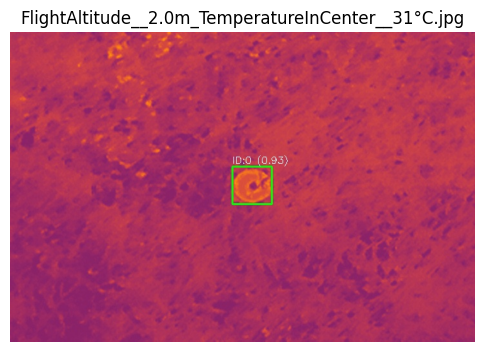

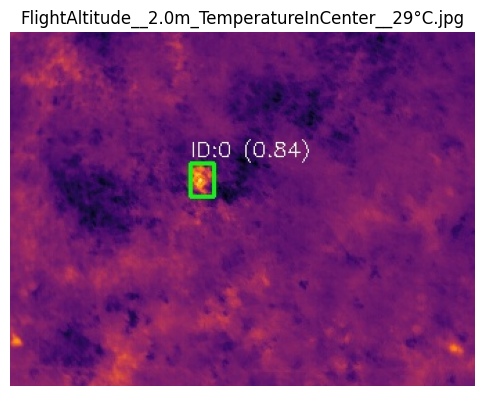

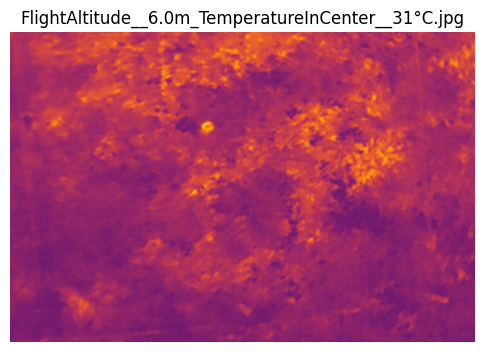

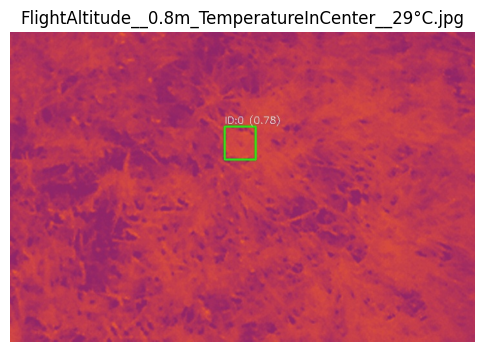

In [ ]:
import os
import matplotlib.pyplot as plt
import cv2

# Ruta a tu carpeta de imágenes
carpeta = '/content/algo'  # cambia esto a la carpeta que necesites

# Listar todos los archivos de imagen (filtrar por extensiones comunes)
imagenes = [f for f in os.listdir(carpeta) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Mostrar todas las imágenes
for img_file in imagenes:
    img_path = os.path.join(carpeta, img_file)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # convertir de BGR (OpenCV) a RGB (matplotlib)

    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title(img_file)
    plt.axis('off')
    plt.show()

# **ALGORITMO PARA CONTABILIZAR EL ERROR EN LAS IMÁGENES**

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
from IPython.display import display
import ipywidgets as widgets

# Carpetas
images_folder = "/content/runs/detect/al_9_10"  # Donde están las imágenes ya con boxes dibujados
labels_folder = '/content/runs/detect/al_9_10/labels'  # Donde están los .txt de los labels

# Cargar imágenes (asumimos .jpg o .png)
image_files = sorted([
    f for f in os.listdir(images_folder)
    if f.lower().endswith(('.jpg', '.png'))
])

# Widgets
output = widgets.Output()
input_box = widgets.BoundedIntText(value=0, min=0, description='Reales:')
btn = widgets.Button(description='Siguiente imagen')

# Estado
indice = 0
resultados = []

# Función para contar cajas desde el archivo .txt
def contar_bboxes(path_txt):
    if not os.path.exists(path_txt):
        return 0
    with open(path_txt, 'r') as f:
        lines = [line for line in f if line.strip()]
        return len(lines)

# Nueva función de satisfacción basada en error relativo
def calcular_satisfaccion(detectadas, reales):
    if reales == 0:
        return 100.0 if detectadas == 0 else 0.0
    error = abs(detectadas - reales) / reales
    satisfaccion = max(0.0, 100.0 - (error * 100.0))
    return satisfaccion

# Mostrar imagen y cantidad de cajas detectadas
def mostrar_imagen():
    output.clear_output(wait=True)
    global indice

    if indice >= len(image_files):
        with output:
            promedio = sum(resultados) / len(resultados) if resultados else 0
            print(f'✅ Validación completa. Satisfacción promedio: {promedio:.2f}%')
        btn.disabled = True
        return

    nombre_img = image_files[indice]
    nombre_txt = nombre_img.replace('.jpg', '.txt').replace('.png', '.txt')

    path_img = os.path.join(images_folder, nombre_img)
    path_txt = os.path.join(labels_folder, nombre_txt)

    detectadas = contar_bboxes(path_txt)

    with output:
        img = cv2.imread(path_img)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(8, 6))
        plt.imshow(img)
        plt.axis('off')
        plt.title(f'{nombre_img} - Cajas detectadas: {detectadas}')
        plt.show()

# Lógica al hacer clic en "Siguiente imagen"
def siguiente_imagen(_):
    global indice
    nombre_img = image_files[indice]
    nombre_txt = nombre_img.replace('.jpg', '.txt').replace('.png', '.txt')
    path_txt = os.path.join(labels_folder, nombre_txt)

    detectadas = contar_bboxes(path_txt)
    reales = input_box.value

    satisfaction = calcular_satisfaccion(detectadas, reales)

    resultados.append(satisfaction)
    indice += 1
    mostrar_imagen()

# Conectar botón
btn.on_click(siguiente_imagen)

# Iniciar interfaz
display(input_box, btn, output)
mostrar_imagen()


BoundedIntText(value=0, description='Reales:')

Button(description='Siguiente imagen', style=ButtonStyle())

Output()